# Training the network

In [2]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [6]:
# create a transform 
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))])
# get the data 
traindata = datasets.MNIST('~/.pytorch/MNIST_data/', train=True, transform=transform, download=True)

# Load the data
trainloader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle=True);

Sequential:
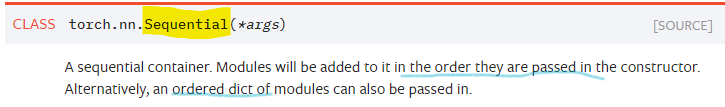    

In [11]:
# Create a sequential feed-forward model
model = nn.Sequential(nn.Linear(784, 128),
                         nn.ReLU(),
                         nn.Linear(128, 64),
                         nn.ReLU(),
                         nn.Linear(64, 10))

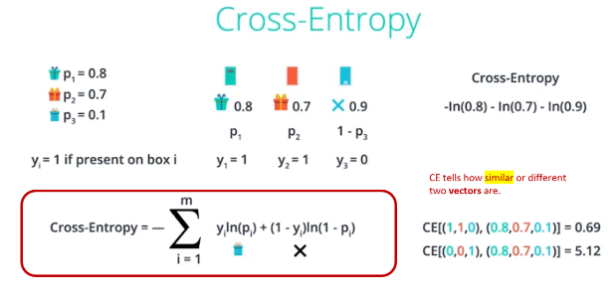

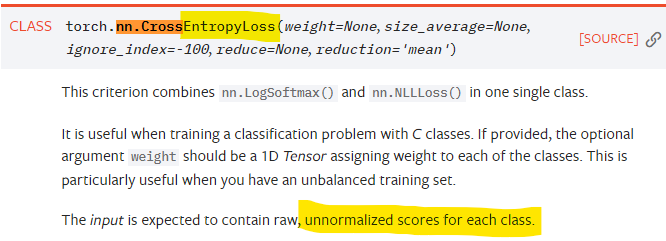

In [13]:
# loss criterion
criterion = nn.CrossEntropyLoss()

# Get flattened data
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.view(images.shape[0], -1)

# get the "logits" => raw scores from the model before applying softmax
# as CrossEntropyLoss applies softmax, then Neg log loss function on it 
logits = model(images)


loss = criterion(logits, labels)
print(loss)

tensor(2.2983, grad_fn=<NllLossBackward>)


**Without using CrossEntropyLoss()**

when applying logsoftmax make sure to set dim=1, for columnwise prob

In [19]:
# Create a sequential feed-forward model
modelSeq = nn.Sequential(nn.Linear(784, 128),
                         nn.ReLU(),
                         nn.Linear(128, 64),
                         nn.ReLU(),
                         nn.Linear(64, 10),
                         nn.LogSoftmax(dim=1))

# loss criterion
criterion = nn.NLLLoss()

# Get flattened data
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.view(images.shape[0], -1)

# get "log(probabilities)" from model since we applied softmax already
logps = modelSeq(images)


loss = criterion(logps, labels)
print(loss)

tensor(2.3390, grad_fn=<NllLossBackward>)


### Autograd

 Torch provides a module, `autograd`, for automatically calculating the gradients of tensors. We can use it to calculate the gradients of all our parameters with respect to the loss. Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way. 
 
 * requires_grad = True
 * tensor.requires_grad -> whether gradients are set or not
 * tensor.grad_fn -> displays the gradient function used
 * tensor.grad -> display the calculated gradients if backpropagated
 * tensor.backward() -> to compute the gradients
 
 
 * to call backward() twice use "retain_graph=True"
  
  *RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.*
 
 
 pytorch reference: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html 
 

In [35]:
x = torch.randn(2, 2, requires_grad=True)
x

tensor([[ 1.4465,  1.1789],
        [-0.7555,  2.3532]], requires_grad=True)

In [36]:
y = x**2
print(y, "\n")

#to display the gradient function itself
print(y.grad_fn, "\n")

# Now x does not have gradients computed already
print(x.grad)

tensor([[2.0925, 1.3898],
        [0.5708, 5.5377]], grad_fn=<PowBackward0>) 


None


Here, PowBackward will be the function used to create the gradients when this is backpropagated

In [30]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

the backward() call can be done for scalar values only !


In [37]:
z = y.mean()
z.backward()

Print gradients: **d(z)/dx**

**Since we set requires_grad=True for x, it differentiates the tensor on which backward() was applied with respect to x **

In [39]:
print(x.grad)
print(x/2)

tensor([[ 0.7233,  0.5895],
        [-0.3778,  1.1766]])
tensor([[ 0.7233,  0.5895],
        [-0.3778,  1.1766]], grad_fn=<DivBackward0>)
